# Определение перспективного тарифа для телеком-компании

Компания «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо провести предварительный анализ тарифов на небольшой выборке клиентов. 

В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.  

**Описание тарифов**

*Тариф «Смарт»*  

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

*Тариф «Ультра»*  

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Примечание:**

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**Описание данных**

*Таблица users (информация о пользователях):*

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

*Таблица calls (информация о звонках):* 

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

*Таблица messages (информация о сообщениях):*  

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

*Таблица internet (информация об интернет-сессиях):*  

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

*Таблица tariffs (информация о тарифах):*

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Изучение данных из файлов и предобработка данных

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt #
import numpy as np
from scipy import stats as st
сalls = pd.read_csv('/datasets/calls.csv')  # чтение файла с данными
сalls.head(10) # получение первых 10 строк таблицы

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [2]:
сalls.info() # посмотрим информацию об общем количестве строк,колонок и их названии, о типе данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
сalls['month'] = pd.DatetimeIndex(сalls['call_date']).month #создаем столбец с месяцем
сalls['month'] = сalls['month'].astype('Int64') #меняем тип данных
сalls['duration'] = np.ceil(сalls['duration']).astype(int) # округляем звонки до минут в большую сторону
сalls.head() # проверим выполнение действий

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [4]:
сalls['duration'].value_counts() #поиск неявных дубликатов в столбце

0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
36        2
37        2
38        2
Name: duration, dtype: int64

In [5]:
pivot_table_сalls = (сalls.pivot_table(index=['user_id','month'],values='duration',aggfunc=['count','sum'],fill_value=0)).reset_index()
display('Количество израсходованных минут разговора и количество сделанных звонков',pivot_table_сalls.head(10))

'Количество израсходованных минут разговора и количество сделанных звонков'

,user_id,month,count,sum
,,,duration,duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430


In [6]:
pivot_table_сalls.columns=['user_id','month','calls_count','calls_sum'] # переименовала два последних столбца
display(pivot_table_сalls.head(10))

,user_id,month,calls_count,calls_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


**Вывод**

Звонки с нулевой продолжительностью это не ошибочные данные: нулями обозначены пропущенные звонки.Округлили звонки до минут, изменив тип данных на целое число.
Добавила столбцы с месяцами.

Количество израсходованных минут разговора и количество сделанных звонков по месяцам.

In [7]:
internet = pd.read_csv('/datasets/internet.csv') #чтение файла с данными
internet.head(10) # получение первых 10 строк таблицы

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [8]:
internet.info() # посмотрим информацию об общем количестве строк,колонок и их названии, о типе данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month #создаем столбец с месяцем
internet['month'] = internet['month'].astype('Int64') #меняем тип данных
internet['mb_used'] = internet['mb_used']/1024 # переводим мегабайты в гигабайты
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,0.110303,2018-11-25,1000,11
1,1,1000_1,1.028135,2018-09-07,1000,9
2,2,1000_2,1.169199,2018-06-25,1000,6
3,3,1000_3,0.537373,2018-08-22,1000,8
4,4,1000_4,0.295469,2018-09-24,1000,9
5,5,1000_5,0.390596,2018-10-02,1000,10
6,6,1000_6,0.527422,2018-09-07,1000,9
7,7,1000_7,0.405957,2018-07-11,1000,7
8,8,1000_8,0.493555,2018-10-08,1000,10
9,9,1000_9,0.337441,2018-09-03,1000,9


In [10]:
pivot_table_internet =(internet.pivot_table(index=['user_id','month'],values='mb_used',aggfunc='sum',fill_value=0)).reset_index() # объединяем данные из двух таблиц
pivot_table_internet['mb_used'] = np.ceil(pivot_table_internet['mb_used']).astype(int) # округляем в большую сторону занчения.
display('Объем израсходованного интернет-трафика',pivot_table_internet.head(10))


'Объем израсходованного интернет-трафика'

,user_id,month,mb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
5,1000,10,15
6,1000,11,15
7,1000,12,10
8,1001,11,18
9,1001,12,14


**Вывод**

Добавила столбец с месяцами,изменила тип данных.

Перевела мегабайты в гигабайты, округлив в большую сторону.
Было выявлено, что не все пользуются мобильным интернетом, в связи с чем трафик получается нулевым в 19598 случаев.

Посчитала объем израсходованного интернет-трафика по месяцам.


In [11]:
messages = pd.read_csv('/datasets/messages.csv') # чтение файла с данными
messages.head(10) # получение первых 10 строк таблицы

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [12]:
messages.info() # посмотрим информацию об общем количестве строк,колонок и их названии, о типе данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month #создаем столбец с месяцем
messages['month'] = messages['month'].astype('Int64') #меняем тип данных
messages.head(10)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


In [14]:
pivot_table_messages_count= (messages.pivot_table(index=['user_id','month'],values='id',aggfunc='count',fill_value=0)).reset_index()  # объединяем данные из двух таблиц
display('Количество отправленных сообщений',pivot_table_messages_count.head(10))

'Количество отправленных сообщений'

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


**Вывод**

Добавила столбец с месяцами,изменила тип данных.

Посчитала количество отправленных сообщений по месяцам

In [15]:
tariffs = pd.read_csv('/datasets/tariffs.csv') # чтение файла с данными
#tariffs.head(10) # получение первых 10 строк таблицы
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included']/1024 #переводим мегабайты в гигабайты
tariffs.columns =['messages_included','gb_per_month_included','minutes_included','rub_monthly_fee','rub_per_gb','rub_per_message','rub_per_minute','tariff'] # переименовала последний столбец
tariffs.head(10)

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


In [16]:
tariffs.info() # посмотрим информацию об общем количестве строк,колонок и их названии, о типе данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   rub_monthly_fee        2 non-null      int64  
 4   rub_per_gb             2 non-null      int64  
 5   rub_per_message        2 non-null      int64  
 6   rub_per_minute         2 non-null      int64  
 7   tariff                 2 non-null      object 
dtypes: float64(1), int64(6), object(1)
memory usage: 256.0+ bytes


In [17]:
users = pd.read_csv('/datasets/users.csv') # чтение файла с данными
users.head(10) # получение первых 10 строк таблицы

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [18]:
users.info() # посмотрим информацию об общем количестве строк,колонок и их названии, о типе данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
users['month'] = pd.DatetimeIndex(users['reg_date']).month  #создаем столбец с месяцем

In [20]:
users.isna().sum()# найдем строки с пропусками

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
month           0
dtype: int64

**Вывод**

В таблице даты прекращения пользования тарифом (churn_date) -462 пропущенных значения.  По условиям данных - если значение пропущено, то тариф ещё действовал на момент выгрузки данных.

In [21]:
df_merge = pivot_table_сalls.merge(pivot_table_internet, on=['user_id', 'month'], how='outer') #объединяем несколько таблиц в одну
df_merge = df_merge.merge(pivot_table_messages_count, on=['user_id', 'month'], how='outer')
df_merge = df_merge.merge(users, on='user_id', how='left')
df_merge = df_merge.merge(tariffs, on='tariff', how='left') 
df_merge = df_merge.rename(columns={'mb_used': "gb_used", 'id': "messages_count"}) #переименовали столбцы
df_merge_smart = df_merge.query('tariff == "smart"')
df_merge_ultra = df_merge.query('tariff == "ultra"')
display(df_merge.head(10)) #проверим полученные данные таблицы

,user_id,month_x,calls_count,calls_sum,gb_used,messages_count,age,churn_date,city,first_name,...,reg_date,tariff,month_y,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,3.0,22.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1
1,1000,6,43.0,172.0,23.0,60.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1
2,1000,7,47.0,340.0,14.0,75.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1
3,1000,8,52.0,408.0,14.0,81.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1
4,1000,9,58.0,466.0,15.0,57.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1
5,1000,10,57.0,350.0,15.0,73.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1
6,1000,11,43.0,338.0,15.0,58.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1
7,1000,12,46.0,333.0,10.0,70.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1
8,1001,11,59.0,430.0,18.0,NaN,41,NaN,Москва,Иван,...,2018-11-01,smart,11,50,15.0,500,550,200,3,3
9,1001,12,63.0,414.0,14.0,NaN,41,NaN,Москва,Иван,...,2018-11-01,smart,11,50,15.0,500,550,200,3,3


In [22]:
df_merge['minutes_overrun']  = df_merge['calls_sum'] - df_merge['minutes_included'] #посчитала перерасход по звонкам
df_merge['messages_overrun'] = df_merge['messages_count'] - df_merge['messages_included'] #посчитала перерасход по сообщениям
df_merge['gb_used_overrun']  = df_merge['gb_used'] - df_merge['gb_per_month_included'] #посчитала перерасход по интернет-трафику
def get_revenue(row):    #создаем функцию для подсчета выручки
    revenue_by_min = 0
    revenue_by_messages = 0
    revenue_gb = 0
    if row['minutes_overrun'] > 0:
        revenue_by_min = row['minutes_overrun'] * row['rub_per_minute'] 
    if row['messages_overrun'] >0:
        revenue_by_messages = row['messages_overrun'] * row['rub_per_message']
    if row['gb_used_overrun'] > 0:
        revenue_gb = row['gb_used_overrun'] * row['rub_per_gb']          
    return revenue_by_min + revenue_by_messages + revenue_gb
df_merge['revenue'] = df_merge.apply(get_revenue,axis=1)
df_merge['revenue'] = df_merge['revenue']+df_merge['rub_monthly_fee'] # к столбцу дохода от услуг прибавляем столбец абонентской платы
pd.set_option('display.max_columns', None) #выводим все колонки
display(df_merge.head(50))

,user_id,month_x,calls_count,calls_sum,gb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,month_y,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,gb_used_overrun,revenue
0,1000,5,22.0,159.0,3.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1,-2841.0,-978.0,-27.0,1950.0
1,1000,6,43.0,172.0,23.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1,-2828.0,-940.0,-7.0,1950.0
2,1000,7,47.0,340.0,14.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1,-2660.0,-925.0,-16.0,1950.0
3,1000,8,52.0,408.0,14.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1,-2592.0,-919.0,-16.0,1950.0
4,1000,9,58.0,466.0,15.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1,-2534.0,-943.0,-15.0,1950.0
5,1000,10,57.0,350.0,15.0,73.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1,-2650.0,-927.0,-15.0,1950.0
6,1000,11,43.0,338.0,15.0,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1,-2662.0,-942.0,-15.0,1950.0
7,1000,12,46.0,333.0,10.0,70.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1,-2667.0,-930.0,-20.0,1950.0
8,1001,11,59.0,430.0,18.0,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11,50,15.0,500,550,200,3,3,-70.0,NaN,3.0,1150.0
9,1001,12,63.0,414.0,14.0,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11,50,15.0,500,550,200,3,3,-86.0,NaN,-1.0,550.0


**Вывод**

Объединила несколько таблиц в одну для дальнейшего подсчета выручки по пользователям. Добавила столбец с подсчитаной выручкой.


## Анализ данных

,mean,var,std
,calls_sum,calls_sum,calls_sum
tariff,,,
smart,419,35844,189
ultra,545,94203,306


_______________________________________________


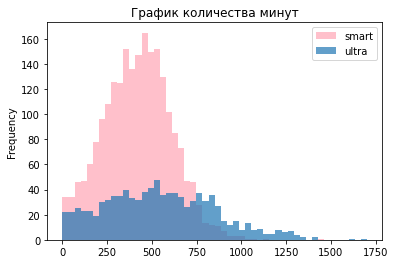

In [23]:
df_merge_tariff_minutes = df_merge.pivot_table( index= 'tariff', values= 'calls_sum', aggfunc= ['mean', 'var','std']) #объединяем таблицы для подсчета среднего количества, дисперсии и стандартного отклонения минут разговора каждого тарифа в месяц
display(df_merge_tariff_minutes.astype(int)) # выводим таблицу на экран, округлив значения до целого числа
print('_______________________________________________')
(df_merge_smart['calls_sum'].plot(bins=50,kind='hist',color='pink',range=(0,1700),
                                 label='smart',legend=True,title='График количества минут'))
(df_merge_ultra['calls_sum'].plot(bins=50,kind='hist',alpha=0.7,range=(0,1700),
                                 label='ultra',legend=True,title='График количества минут'))
plt.show()

**Вывод**

Объединила таблицы для подсчета среднего количества, дисперсии и стандартного отклонения минут разговора каждого тарифа в месяц.
Пользователи тарифа Smart используют меньше звонков, чем пользователи тарифа Ultra.

,mean,var,std
,messages_count,messages_count,messages_count
tariff,,,
smart,38,717,26
ultra,61,2109,45


__________________________________________________


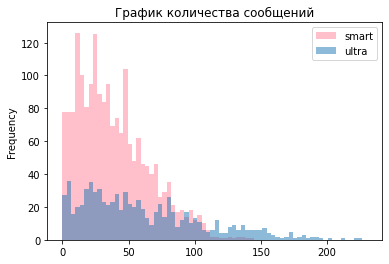

In [24]:
df_merge_tariff_messages = df_merge.pivot_table( index= 'tariff', values= 'messages_count', aggfunc= ['mean', 'var','std']) #объединяем таблицы для подсчета среднего количества, дисперсии и стандартного отклонения сообщений каждого тарифа в месяц
display(df_merge_tariff_messages.astype(int)) # выводим таблицу на экран, округлив значения до целого числа
print('__________________________________________________')
(df_merge_smart['messages_count'].plot(bins=70,kind='hist',color='pink',range=(0,230),
                                 label='smart',legend=True,title='График количества сообщений'))
(df_merge_ultra['messages_count'].plot(bins=70,kind='hist',alpha=0.5,range=(0,230),
                                 label='ultra',legend=True,title='График количества сообщений'))
plt.show()

**Вывод**

Объединяем таблицы для подсчета среднего количества, дисперсии и стандартного отклонения сообщений каждого тарифа в месяц.


Пользователи тарифа Smart используют меньше сообщений, чем пользователи тарифа Ultra.

,mean,var,std
,gb_used,gb_used,gb_used
tariff,,,
smart,16,32,5
ultra,19,94,9


__________________________________________________


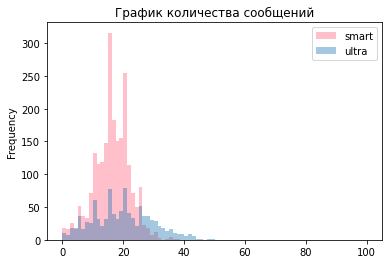

In [25]:
df_merge_tariff_gb_used = df_merge.pivot_table( index= 'tariff', values= 'gb_used', aggfunc= ['mean', 'var','std']) #объединяем таблицы для подсчета среднего количества, дисперсии и стандартного отклонения потребляемого интернет-трафика каждого тарифа в месяц
display(df_merge_tariff_gb_used.astype(int)) # выводим таблицу на экран, округлив значения до целого числа
print('__________________________________________________')
(df_merge_smart['gb_used'].plot(bins=80,kind='hist',color='pink',range=(0,100),
                                 label='smart',legend=True,title='График количества сообщений'))
(df_merge_ultra['gb_used'].plot(bins=80,kind='hist',alpha=0.4,range=(0,100),
                                 label='ultra',legend=True,title='График количества сообщений'))
plt.show()

**Вывод**

Объединила таблицы для подсчета среднего количества, дисперсии и стандартного отклонения потребляемого интернет-трафика каждого тарифа в месяц

Чуть больше используют интернет-трафик пользователи пакета Smart.

## Проверка гипотез

**Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

Сформулируем нулевую и альтернативную гипотезы:
- H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна
- H1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна

In [26]:
revenue_smart = df_merge.query('tariff == "smart"')['revenue']
revenue_ultra = df_merge.query('tariff == "ultra"')['revenue']
alpha =0.05 #задаем критический уровень статистической значимости
results = st.ttest_ind(revenue_smart,revenue_ultra,equal_var=False)
print('p-значение:',results.pvalue)
if results.pvalue < alpha: #сравниваем получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


**Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

Сформулируем нулевую и альтернативную гипотезы:

- H0 - Средняя выручка пользователей из Москвы и других регионов равна
- H1 - Средняя выручка пользователей из Москвы и других регионов не равна


In [27]:
from_Moscow = df_merge.query('city == "Москва"')['revenue']
not_from_Moscow = df_merge.query('city != "Москва"')['revenue']
alpha =0.05 #задаем критический уровень статистической значимости
results = st.ttest_ind(from_Moscow,not_from_Moscow)
print('p-значение:',results.pvalue)
if results.pvalue < alpha: #сравниваем получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


**Вывод**

После проверки гипотез вывлено, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна, а также средняя выручка пользователей из Москвы и других регионов равна.



## Общий вывод

Проанализировав данные выявили, что пользователи тарифа Smart используют меньше звонков и сообщений, чем пользователи тарифа Ultra, а интернет-трафика больше.

После проверки гипотез вывлено, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна, а средняя выручка пользователей из Москвы и других регионов равна.

Тариф Ultra приносит больший доход компании «Мегалайн».